In [1]:
import os

In [2]:
import torch
num_gpu = torch.cuda.device_count()
print(num_gpu)

2


## Move dataset to the working area as mentioned in yaml file

In [2]:
import shutil

src_dir_path = "/kaggle/input/kitchen-utensils/images"
des_dir_path = "/kaggle/working/images/"

folder = ['test', 'train', 'valid']

os.makedirs(des_dir_path, exist_ok=True)
for srcf in folder:
    src = src_dir_path+"/"+srcf
    shutil.copytree(src, os.path.join(des_dir_path, srcf))

print("Directories copied successfully!")

Directories copied successfully!


## Install ultralytics

In [3]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

## Create YOLOv8 Model

In [11]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

In [50]:
model.train(
    data='/kaggle/input/kitchen-utensils/images/data.yaml',
    epochs=160,
    lr0=0.0042,
    imgsz=640,
    batch=16,
    # optimizer='SGD',
    # box=0.1,
    # cls=1.0,
    # mixup=0.2,
    # mosaic=0.6,
    # flipud=0.6,
    # fliplr=0.6,
    # hsv_s=0.5,
    # hsv_h=0.01,
    project='yolo',
    name='evolve_v8',
    exist_ok=True,
    device=[-1,-1]
)

Searching for 2 idle GPUs with >= 2048 MiB free memory...
Selected idle CUDA devices [1, 0]
Ultralytics 8.3.140 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:1 (Tesla T4, 15095MiB)
                                                        CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/kitchen-utensils/images/data.yaml, degrees=0.0, deterministic=True, device=1,0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=160, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0042, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8s.pt, momentum=

train: Scanning /kaggle/working/images/train/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 150.0±83.1 MB/s, size: 6.5 KB)


val: Scanning /kaggle/working/images/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]


Plotting labels to yolo/evolve_v8/labels.jpg... 
optimizer: SGD(lr=0.0042, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to yolo/evolve_v8
Starting training for 160 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/160      1.96G      1.636      4.422      1.956         41        640: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]


                   all         27         47     0.0334     0.0794     0.0386     0.0165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/160      2.37G      1.724      4.233      1.944         35        640: 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]


                   all         27         47      0.325     0.0843     0.0742     0.0483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/160      2.38G      1.685      3.395      1.841         54        640: 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]


                   all         27         47     0.0855      0.121     0.0924     0.0672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/160      2.38G      1.588      2.992      1.796         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]


                   all         27         47      0.236      0.334      0.197      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/160      2.38G      1.647      2.603      1.844         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]


                   all         27         47      0.279      0.349      0.218      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/160      2.38G      1.329      2.333      1.684         18        640: 100%|██████████| 8/8 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


                   all         27         47      0.334      0.494      0.325      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/160       2.4G      1.359      2.091       1.71         19        640: 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]


                   all         27         47      0.229      0.489       0.26       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/160       2.4G      1.209      1.742      1.554         30        640: 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


                   all         27         47      0.273      0.368      0.221      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/160      2.41G      1.266      1.991       1.56         16        640: 100%|██████████| 8/8 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]


                   all         27         47      0.447      0.325        0.3      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/160      2.43G      1.404      1.886      1.709         24        640: 100%|██████████| 8/8 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]


                   all         27         47      0.456      0.471      0.386      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/160      2.43G      1.182      1.811      1.561         39        640: 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]


                   all         27         47      0.405      0.486      0.391      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/160      2.43G      1.176      1.634      1.539         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]


                   all         27         47      0.547      0.367      0.358      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/160      2.43G      1.145      1.614      1.506         24        640: 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]


                   all         27         47      0.506      0.381      0.365      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/160      2.45G      1.114      1.555      1.418         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]


                   all         27         47      0.623      0.514      0.533      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/160      2.45G      1.143        1.6      1.495         41        640: 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]


                   all         27         47      0.519      0.557      0.531      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/160      2.45G      1.059       1.59      1.442         21        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]


                   all         27         47      0.683      0.515      0.517      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/160      2.45G      1.057      1.402      1.434         26        640: 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]


                   all         27         47      0.504      0.725      0.572       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/160      2.45G       1.13      1.408      1.427         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]


                   all         27         47      0.496      0.699      0.578      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/160      2.45G      0.991      1.234      1.352         19        640: 100%|██████████| 8/8 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]


                   all         27         47      0.471       0.69      0.549      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/160      2.45G      1.034      1.294      1.336         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]


                   all         27         47      0.496      0.627      0.518      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/160      2.45G     0.9981      1.207      1.301         29        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]


                   all         27         47      0.635      0.413      0.494      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/160      2.45G      1.018      1.317        1.4         15        640: 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]


                   all         27         47      0.373        0.4      0.361      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/160      2.45G     0.8997      1.246      1.295         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]


                   all         27         47       0.45      0.347      0.326      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/160      2.45G     0.9278      1.215      1.301         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]


                   all         27         47      0.325      0.455      0.326      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/160      2.45G     0.8482      1.174      1.251         24        640: 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]


                   all         27         47      0.463      0.384      0.375      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/160      2.45G       1.04       1.21      1.391         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]


                   all         27         47      0.368       0.52      0.418       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/160      2.45G     0.8658      1.063      1.231         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]


                   all         27         47      0.365       0.62      0.458       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/160      2.45G       0.92      1.122      1.292         39        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]


                   all         27         47      0.455      0.752      0.527       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/160      2.45G     0.9897      1.194      1.341         52        640: 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]


                   all         27         47      0.513      0.641      0.573       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/160      2.45G      0.823     0.9232      1.226         36        640: 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]


                   all         27         47      0.539      0.685      0.589      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/160      2.45G     0.9633      1.148      1.337         25        640: 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]


                   all         27         47      0.519      0.626      0.599      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/160      2.45G     0.9116      1.124      1.313         23        640: 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]


                   all         27         47      0.553      0.667      0.632      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/160      2.45G      0.896      1.053      1.282         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]


                   all         27         47       0.52      0.813      0.653      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/160      2.45G     0.9418      1.133      1.357         34        640: 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]


                   all         27         47      0.594      0.744      0.718       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/160      2.46G     0.9157      1.145      1.306         14        640: 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]


                   all         27         47      0.608      0.765      0.717      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/160      2.46G     0.9148      1.023      1.296         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]


                   all         27         47      0.596      0.758      0.678       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/160      2.46G      0.903      1.145      1.266         23        640: 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]


                   all         27         47      0.525      0.842       0.65      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/160      2.48G     0.7491     0.8905      1.194         15        640: 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


                   all         27         47      0.501      0.822      0.614      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/160      2.48G     0.8444      1.024      1.235         40        640: 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]


                   all         27         47      0.553      0.718      0.639       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/160      2.48G     0.8792      1.099      1.219         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]


                   all         27         47      0.602       0.73      0.653      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/160      2.48G     0.8417      1.051      1.228         51        640: 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]


                   all         27         47      0.667      0.642      0.668      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/160       2.5G     0.8134     0.9302      1.241         26        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]


                   all         27         47      0.531      0.752      0.662       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/160       2.5G     0.9673      1.132      1.323         29        640: 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]


                   all         27         47      0.553      0.771      0.635      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/160       2.5G     0.9223     0.9889      1.348         14        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]


                   all         27         47      0.544      0.788      0.635      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/160       2.5G     0.7731     0.8014        1.2         20        640: 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]


                   all         27         47      0.592      0.723      0.671      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/160      2.53G     0.8264     0.8857      1.225         28        640: 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]


                   all         27         47      0.705      0.645      0.742      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/160      2.53G     0.9141      1.132      1.343         28        640: 100%|██████████| 8/8 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]


                   all         27         47       0.69      0.643      0.713       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/160      2.53G     0.7302      0.901      1.191         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


                   all         27         47      0.632      0.668      0.703      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/160      2.53G     0.8531     0.9356        1.2         30        640: 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


                   all         27         47      0.576      0.663      0.623      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/160      2.55G     0.7664     0.9081      1.209         17        640: 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]


                   all         27         47      0.644      0.617      0.734      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/160      2.55G      0.868     0.9716      1.268         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]


                   all         27         47      0.686      0.719      0.785      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/160      2.55G     0.9839     0.9985      1.334         40        640: 100%|██████████| 8/8 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]


                   all         27         47      0.728      0.844      0.826      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/160      2.55G     0.9285      1.056      1.348         29        640: 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]


                   all         27         47      0.674      0.627      0.676      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/160      2.55G     0.7328     0.9416       1.19         35        640: 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]


                   all         27         47      0.649       0.66      0.718      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/160      2.55G     0.7378     0.8195      1.158         25        640: 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]


                   all         27         47      0.567      0.726      0.643      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/160      2.55G     0.8577     0.9636      1.216         43        640: 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]


                   all         27         47      0.674      0.823      0.779      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/160      2.55G     0.8195     0.9141      1.249         20        640: 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]


                   all         27         47      0.688       0.79      0.756      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/160      2.55G     0.8982     0.9282      1.241         28        640: 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]


                   all         27         47      0.688      0.711      0.751      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/160      2.55G     0.8638     0.8395      1.255         19        640: 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]


                   all         27         47      0.668      0.675       0.73      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/160      2.55G     0.8389     0.9518      1.244         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]


                   all         27         47      0.753      0.571      0.738      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/160      2.55G     0.8161     0.9189      1.231         36        640: 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]


                   all         27         47       0.56      0.855       0.75       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/160      2.55G     0.8211     0.8812      1.254         21        640: 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]


                   all         27         47      0.805      0.636      0.787      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/160      2.55G     0.7986     0.8483       1.25         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]


                   all         27         47      0.808      0.692      0.814      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/160      2.55G     0.7001     0.7673      1.163         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]


                   all         27         47       0.64      0.752      0.769      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/160      2.55G      0.672     0.7861      1.118         28        640: 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]


                   all         27         47      0.674      0.708      0.788      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/160      2.55G     0.8686      1.066       1.27         43        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]


                   all         27         47      0.691      0.686      0.761      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/160      2.55G     0.7586     0.8284       1.26         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]


                   all         27         47      0.638      0.716       0.74      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/160      2.55G     0.8463     0.8776      1.232         17        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]


                   all         27         47      0.657      0.768      0.765      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/160      2.55G     0.7611     0.8318      1.205         41        640: 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]


                   all         27         47      0.666      0.758      0.778      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/160      2.55G     0.6535     0.7289      1.149         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]


                   all         27         47      0.712      0.772      0.808      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/160      2.55G     0.7784      0.836       1.23         26        640: 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]


                   all         27         47      0.667      0.798      0.802      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/160      2.55G     0.6383     0.6731      1.102         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


                   all         27         47      0.676      0.754      0.769      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/160      2.55G     0.8199     0.9987      1.257         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]


                   all         27         47      0.643      0.746      0.746      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/160      2.55G     0.7066     0.8455      1.156         19        640: 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]


                   all         27         47      0.613      0.857      0.801      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/160      2.55G     0.7545     0.8773      1.265         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]


                   all         27         47      0.713      0.709      0.803       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/160      2.55G     0.7411     0.8079      1.197         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]


                   all         27         47      0.704      0.695      0.783       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/160      2.55G     0.7526     0.8205      1.236         15        640: 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]


                   all         27         47      0.687      0.718      0.764      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/160      2.55G     0.7147     0.7757      1.148         22        640: 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]


                   all         27         47      0.678      0.715      0.743      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/160      2.55G     0.7194     0.8166      1.226         21        640: 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]


                   all         27         47      0.754      0.711       0.79        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/160      2.55G      0.766     0.7757      1.196         28        640: 100%|██████████| 8/8 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]


                   all         27         47      0.652      0.682      0.726      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/160      2.55G     0.7338     0.7757      1.197         25        640: 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]


                   all         27         47      0.697      0.641      0.723      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/160      2.55G     0.7426     0.7719      1.164         39        640: 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


                   all         27         47      0.548      0.818        0.7      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/160      2.57G     0.7234     0.7156      1.205         21        640: 100%|██████████| 8/8 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]


                   all         27         47      0.571      0.782       0.69      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/160      2.57G     0.7692     0.7464      1.167         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]


                   all         27         47      0.616      0.731      0.716      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/160      2.57G     0.6466     0.6537      1.108         22        640: 100%|██████████| 8/8 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]


                   all         27         47      0.576      0.816        0.7      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/160      2.57G     0.7141     0.7454      1.192         34        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]


                   all         27         47      0.486      0.701      0.628      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/160      2.57G      0.782     0.7249      1.171         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]


                   all         27         47       0.54      0.778      0.673      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/160      2.57G     0.7493     0.8513      1.204         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]


                   all         27         47      0.566      0.794      0.769      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/160      2.57G     0.8359     0.8372      1.253         22        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]


                   all         27         47      0.533      0.771      0.796      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/160      2.57G     0.7519     0.7629      1.202         34        640: 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]


                   all         27         47      0.635      0.669      0.757      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/160      2.57G     0.6347     0.6994      1.096         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]


                   all         27         47      0.535      0.822      0.739      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/160      2.57G     0.7178     0.7693      1.168         43        640: 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]


                   all         27         47      0.515      0.791      0.648      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/160      2.57G     0.6024     0.6042       1.07         35        640: 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


                   all         27         47      0.515       0.79      0.667      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/160      2.57G     0.6382     0.6287      1.117         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]


                   all         27         47       0.61      0.708      0.667      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/160      2.57G     0.6828     0.7277      1.171         24        640: 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]


                   all         27         47      0.617      0.732      0.686      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/160      2.57G     0.6939     0.7372      1.148         29        640: 100%|██████████| 8/8 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]


                   all         27         47      0.592       0.86      0.779      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/160      2.57G     0.6606      0.757      1.156         35        640: 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]


                   all         27         47      0.579      0.884      0.789      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/160      2.57G     0.6755     0.6381      1.141         28        640: 100%|██████████| 8/8 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]


                   all         27         47      0.576      0.736      0.666      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/160      2.57G     0.6994      0.679      1.151         20        640: 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]


                   all         27         47      0.538      0.811      0.693      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/160      2.57G     0.6607     0.6659      1.124         28        640: 100%|██████████| 8/8 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]


                   all         27         47      0.515      0.889      0.739      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/160      2.57G     0.6944     0.7302       1.11         42        640: 100%|██████████| 8/8 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]


                   all         27         47      0.671       0.72      0.779       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/160      2.57G     0.6356      0.647      1.118         30        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]


                   all         27         47      0.661      0.768      0.779      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/160      2.57G     0.6989     0.6498      1.169         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]


                   all         27         47      0.631      0.793      0.785       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/160      2.57G     0.7995     0.7743      1.198         30        640: 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]


                   all         27         47      0.558      0.731      0.755      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/160      2.57G     0.5803     0.5987      1.072         22        640: 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]


                   all         27         47      0.633      0.674      0.741      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/160      2.57G     0.6442     0.6797      1.105         30        640: 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]


                   all         27         47      0.649      0.754       0.79      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/160      2.57G     0.7615     0.7979      1.161         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]


                   all         27         47      0.734      0.784      0.823      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/160      2.57G     0.7314      0.704      1.145         39        640: 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]


                   all         27         47      0.786      0.678      0.814      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/160      2.57G      0.653     0.6725      1.128         29        640: 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]


                   all         27         47      0.769      0.638      0.776      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/160      2.57G      0.623     0.6533       1.11         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]


                   all         27         47       0.83      0.656      0.808      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/160      2.57G     0.7236     0.7614      1.204         19        640: 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]


                   all         27         47      0.617      0.805      0.787      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/160      2.57G     0.7523     0.7509      1.243         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]


                   all         27         47      0.618      0.798      0.789       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/160      2.57G     0.5913     0.6352       1.08         14        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]


                   all         27         47       0.68      0.675       0.75      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/160      2.57G      0.686     0.7527      1.167         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]


                   all         27         47      0.703      0.656      0.705      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/160      2.57G     0.6699     0.6397      1.119         22        640: 100%|██████████| 8/8 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]


                   all         27         47      0.706      0.641      0.717      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/160      2.57G     0.6598     0.6571      1.139         34        640: 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]


                   all         27         47      0.725      0.693       0.74      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/160      2.58G     0.5712     0.5947      1.089         26        640: 100%|██████████| 8/8 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]


                   all         27         47      0.698      0.677       0.76      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/160      2.58G     0.6363     0.6294      1.102         26        640: 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]


                   all         27         47      0.675      0.701      0.764      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/160      2.58G     0.6301       0.65       1.12         24        640: 100%|██████████| 8/8 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]


                   all         27         47      0.703      0.717      0.761      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/160      2.58G     0.6591     0.6383      1.151         30        640: 100%|██████████| 8/8 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]


                   all         27         47      0.696      0.696      0.764      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/160      2.58G     0.6511     0.6922      1.146         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]


                   all         27         47      0.743      0.682      0.799      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/160      2.58G     0.6587     0.6714      1.141         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]


                   all         27         47      0.673      0.898      0.837      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/160      2.58G     0.6122     0.5796      1.067         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]


                   all         27         47      0.665      0.926      0.852      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/160      2.58G     0.6698      0.672      1.124         16        640: 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]


                   all         27         47      0.688      0.841      0.861      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/160      2.58G     0.6433     0.6126      1.095         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]


                   all         27         47      0.671      0.797      0.829      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/160      2.58G     0.5572     0.5192      1.045         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]


                   all         27         47       0.68      0.877      0.828      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/160      2.58G     0.7838     0.7955      1.229         19        640: 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]


                   all         27         47       0.68      0.898      0.821      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/160      2.58G     0.6276     0.6097      1.069         58        640: 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]


                   all         27         47      0.683      0.826      0.794      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/160      2.58G     0.6113     0.6215       1.11         22        640: 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]


                   all         27         47      0.703        0.8      0.785      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/160      2.58G     0.6908     0.6898      1.144         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]


                   all         27         47      0.718      0.819      0.815      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/160      2.58G     0.5749     0.5667      1.081         31        640: 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]


                   all         27         47      0.715      0.827      0.834       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/160      2.58G     0.6826     0.6968      1.118         47        640: 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]


                   all         27         47      0.702      0.816      0.803      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/160      2.58G     0.5912     0.6066      1.085         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]


                   all         27         47      0.649      0.769      0.792       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/160      2.58G     0.6269     0.6166      1.126         34        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]


                   all         27         47      0.649      0.791       0.79      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/160      2.58G     0.6021     0.5983      1.067         42        640: 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]


                   all         27         47      0.648      0.749      0.771      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/160      2.58G     0.5977     0.6127      1.096         42        640: 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]


                   all         27         47      0.675      0.749      0.779      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/160      2.58G     0.6305     0.6288       1.11         32        640: 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]


                   all         27         47      0.688       0.75      0.764      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/160      2.58G     0.5705      0.557      1.068         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]


                   all         27         47      0.715      0.753      0.775      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/160      2.58G     0.5477     0.5187      1.088         20        640: 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]


                   all         27         47      0.692      0.732      0.765      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/160      2.58G     0.6207     0.6409      1.163         36        640: 100%|██████████| 8/8 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]


                   all         27         47      0.709      0.744       0.77      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/160      2.58G     0.5671     0.5258      1.045         30        640: 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]


                   all         27         47      0.719      0.744       0.78       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/160      2.58G     0.6237     0.5661      1.099         26        640: 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]


                   all         27         47      0.748      0.745      0.805      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/160      2.58G     0.5715     0.5662      1.089         26        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]


                   all         27         47      0.672      0.719      0.778      0.633


    144/160      2.58G     0.5658     0.5867      1.218         27        640:  12%|█▎        | 1/8 [00:00<00:01,  6.38it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/160      2.58G     0.5475     0.5499      1.075         44        640: 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]


                   all         27         47      0.601       0.82      0.764      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/160      2.58G     0.7122     0.6566      1.179         37        640: 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]


                   all         27         47      0.691      0.711      0.799      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/160      2.58G     0.6454     0.6515      1.105         18        640: 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]


                   all         27         47      0.689      0.714       0.81      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/160      2.58G     0.6231     0.6847      1.108         29        640: 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]


                   all         27         47      0.678      0.723      0.795       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/160      2.58G     0.7115     0.6975      1.138         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]


                   all         27         47      0.654      0.706       0.78      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/160      2.58G     0.5871     0.5844      1.106         33        640: 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]


                   all         27         47      0.617      0.786      0.807      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/160      2.58G     0.6661     0.6902      1.184         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]


                   all         27         47      0.624      0.793      0.797      0.614
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/160      2.58G     0.3689     0.4173     0.9677         14        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]


                   all         27         47      0.727       0.68      0.796      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/160      2.58G     0.3594     0.3284     0.9359         14        640: 100%|██████████| 8/8 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]


                   all         27         47      0.668      0.703      0.791       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/160      2.58G     0.3433     0.3453     0.9688         22        640: 100%|██████████| 8/8 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


                   all         27         47      0.667      0.815      0.817      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/160      2.58G     0.4055     0.3409     0.9659         16        640: 100%|██████████| 8/8 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]


                   all         27         47      0.727      0.767      0.813      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/160      2.58G     0.3189     0.3215     0.9341          8        640: 100%|██████████| 8/8 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]


                   all         27         47      0.747      0.743      0.811      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/160      2.58G     0.3998     0.3176     0.9579         19        640: 100%|██████████| 8/8 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]


                   all         27         47      0.689      0.722      0.779      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/160      2.58G     0.3851       0.36     0.9324         14        640: 100%|██████████| 8/8 [00:01<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]


                   all         27         47      0.683      0.705      0.781      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/160      2.58G     0.3274     0.3293     0.9206         13        640: 100%|██████████| 8/8 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]


                   all         27         47      0.707        0.7      0.773      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/160      2.58G     0.3352     0.2946     0.8932         15        640: 100%|██████████| 8/8 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]


                   all         27         47      0.713      0.714      0.771      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/160      2.58G     0.3162     0.2897     0.9528         14        640: 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]


                   all         27         47      0.704      0.726      0.772      0.629

160 epochs completed in 0.089 hours.
Optimizer stripped from yolo/evolve_v8/weights/last.pt, 22.5MB
Optimizer stripped from yolo/evolve_v8/weights/best.pt, 22.5MB

Validating yolo/evolve_v8/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:1 (Tesla T4, 15095MiB)
                                                        CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]


                   all         27         47      0.671      0.797      0.829      0.658
                   cup          9         16      0.607      0.938      0.861      0.705
                  fork          9         10      0.544      0.596      0.704       0.56
                 knife         13         21      0.863      0.857      0.922      0.709


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 5.0ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to yolo/evolve_v8


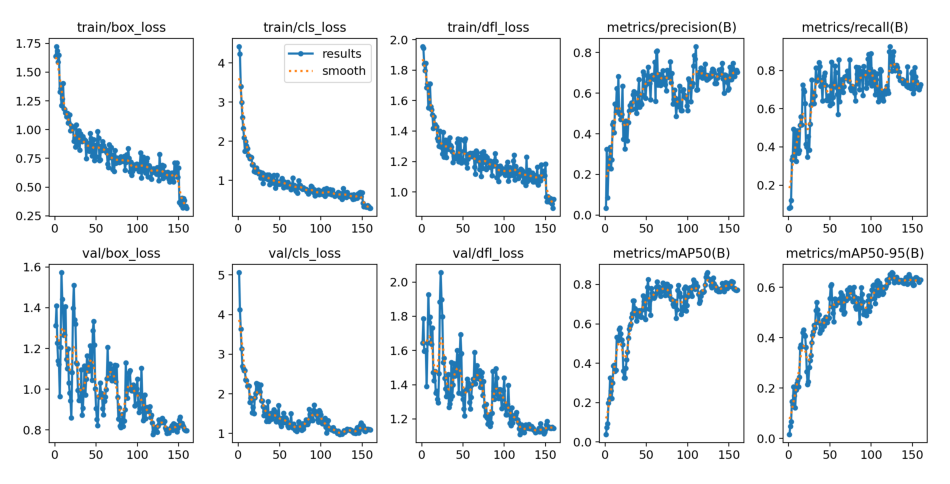

In [51]:
import matplotlib.pyplot as plt

res = '/kaggle/working/yolo/evolve_v8/results.png'

plt.figure(figsize=(12, 8))
img=plt.imread(res)
plt.imshow(img)
plt.axis('off')
plt.show()

In [52]:
import pandas as pd

path = '/kaggle/working/yolo/evolve_v8/results.csv'

results_df = pd.read_csv(path)
map_sc = results_df['metrics/mAP50(B)'].iloc[-1]
precision_sc = results_df['metrics/precision(B)'].values[-1]
recall_sc = results_df['metrics/recall(B)'].values[-1]

print(map_sc)
print(precision_sc)
print(recall_sc)

0.77237
0.7041
0.72642


In [99]:
pt = '/kaggle/working/yolo/evolve_v8/weights/best.pt'
model = YOLO(pt)

results = model.predict(
    source='/kaggle/input/test-data/t8.jpeg',
    save=True 
)




image 1/1 /kaggle/input/test-data/t8.jpeg: 480x640 1 knife, 14.6ms
Speed: 1.7ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict44


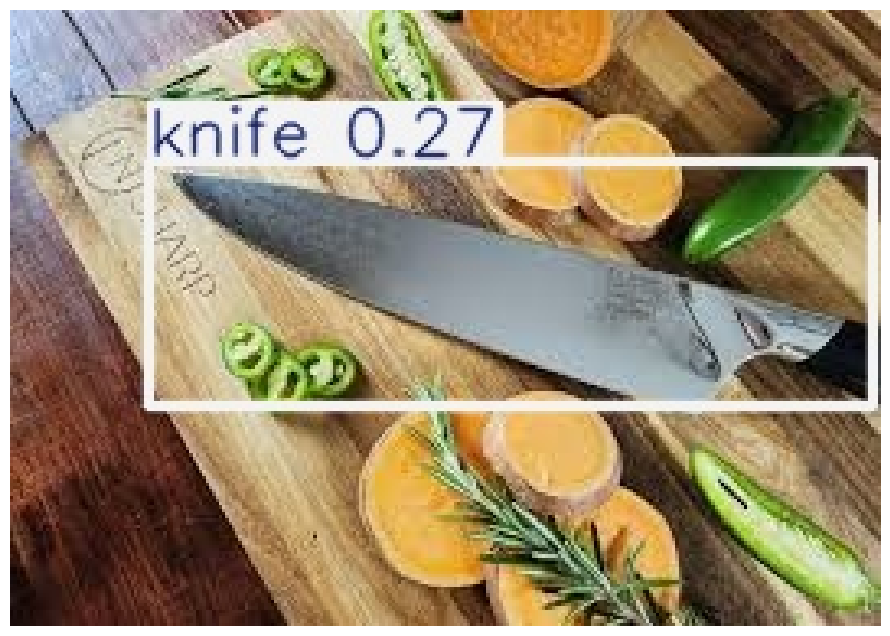

In [100]:
import matplotlib.pyplot as plt

pred = '/kaggle/working/runs/detect/predict44/t8.jpg'
plt.figure(figsize=(12, 8))
img=plt.imread(pred)
plt.imshow(img)
plt.axis('off')
plt.show()

In [98]:
import shutil

def zip_folder(folder_path, output_zip="trained.zip"):
    shutil.make_archive(base_name=output_zip.replace(".zip", ""), format='zip', root_dir=folder_path)
    print(f"Zipped folder '{folder_path}' as '{output_zip}'")

zip_folder('/kaggle/working/yolo/evolve_v8')

Zipped folder '/kaggle/working/yolo/evolve_v8' as 'trained.zip'
